<a href="https://colab.research.google.com/github/Akshi01/Lead-Scoring-Model/blob/main/LeadScoringModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Leads X Education.csv to Leads X Education (2).csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Leads X Education.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
data.shape

(9240, 37)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
data1 = data.copy()

Handling null values

In [8]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
null_values_perc = (data1.isnull().sum()/len(data1))*100
null_values_perc

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
#dropping columns containing more than 45% null values

null_values_45 = null_values_perc[null_values_perc > 45]
data1.drop(columns = null_values_45.index, inplace=True)
data1.shape

(9240, 32)

In [11]:
col_few_na = ['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']

data1.dropna(subset = col_few_na, axis = 0, inplace=True)

In [12]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2296
Specialization                                   1431
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
#Handling null values in 'country' column

# if the city is indian then replacing null values in country with India
indian_cities = ['Mumbai', 'Thane & Outskirts', 'Other Cities of Maharashtra']

for i in data1['Country'].isnull().index:
    if data1.loc[i,'City'] in indian_cities:
        data1['Country'] = "India"
    else:
        data1.loc[i,'Country'] = "Unknown"

In [14]:
#Handling null values in 'specialization, How did you hear about X Education, What is your current occupation' columns
fields = ['Specialization', 'How did you hear about X Education', 'What is your current occupation']
data1[fields] = data1[fields].replace("Select", np.nan)
data1[fields] = data1[fields].fillna("NA")

In [15]:
data1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [16]:
tags_stats = data1['Tags'].value_counts()
tags_stats_less_than_50 = tags_stats[tags_stats < 50]

In [17]:
data['Tags'] = data1['Tags'].apply(lambda x: 'Other' if x in tags_stats_less_than_50 else x)
data['Tags'].value_counts()

Will revert after reading the email    2016
Ringing                                1187
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
switched off                            240
Busy                                    185
Lost to EINS                            172
Other                                   154
Not doing further education             145
Interested  in full time MBA            116
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
Name: Tags, dtype: int64

In [18]:
data1['Tags'] = data1['Tags'].fillna("Unknown")

In [19]:
#city and Lead Profile columns

col = ['City','Lead Profile']
data1[col] = data1[col].fillna("Unknown")

In [20]:
data1 = data1.drop('What matters most to you in choosing a course', axis=1)

In [21]:
data1.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
How did you hear about X Education          0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations           

In [22]:
data2 = data1.copy()

In [23]:
data2.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [24]:
for i in ['Do Not Email', 'Converted','Search','Through Recommendations','A free copy of Mastering The Interview']:
    data2[i] = data2[i].replace("Yes" , 1)
    data2[i] = data2[i].replace("No" , 0)

In [25]:
data2['Do Not Call'].value_counts()

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [26]:
data2['Magazine'].value_counts()

No    9074
Name: Magazine, dtype: int64

In [27]:
data2['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [28]:
data2['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [29]:
data2['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [30]:
data2['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [31]:
data2['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [32]:
data2['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [33]:
data2['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [34]:
#Removing unneseccary and irrelevant columns

data2.drop(['Prospect ID', 'Lead Number', 'Do Not Call', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper', 'Receive More Updates About Our Courses', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1, inplace=True) 

In [35]:
data3 = data2.copy()

EDA

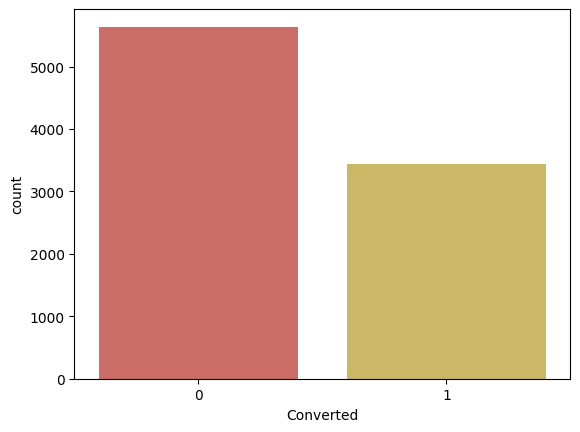

In [36]:
sns.countplot( x = data3.Converted, data = data3, palette = sns.color_palette("hls", 8));

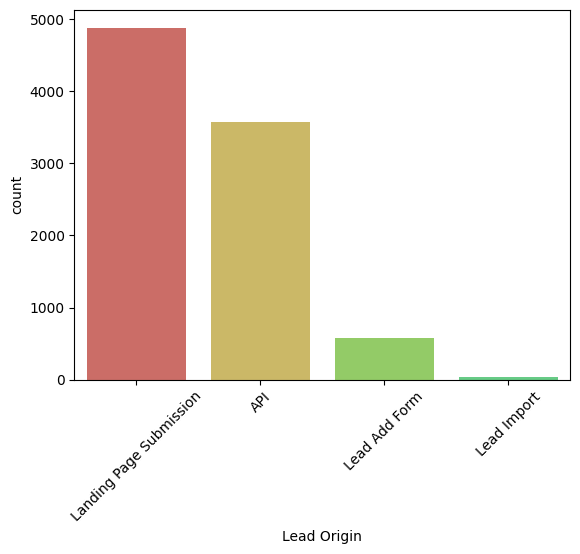

In [37]:
origin_count = data3['Lead Origin'].value_counts().sort_values(ascending=False).index
sns.countplot(x = data3['Lead Origin'], data = data3, order = origin_count, palette = sns.color_palette("hls", 8))

plt.xticks(rotation = 45);

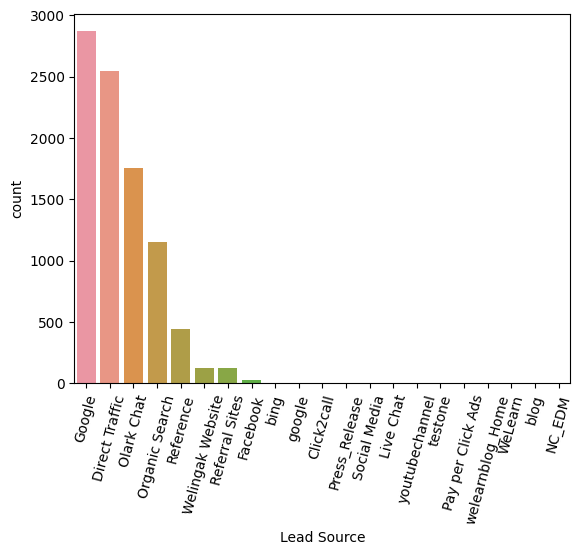

In [38]:
source_count = data3['Lead Source'].value_counts().sort_values(ascending=False).index
sns.countplot(x = data3['Lead Source'], data = data3, order = source_count)

plt.xticks(rotation = 75);

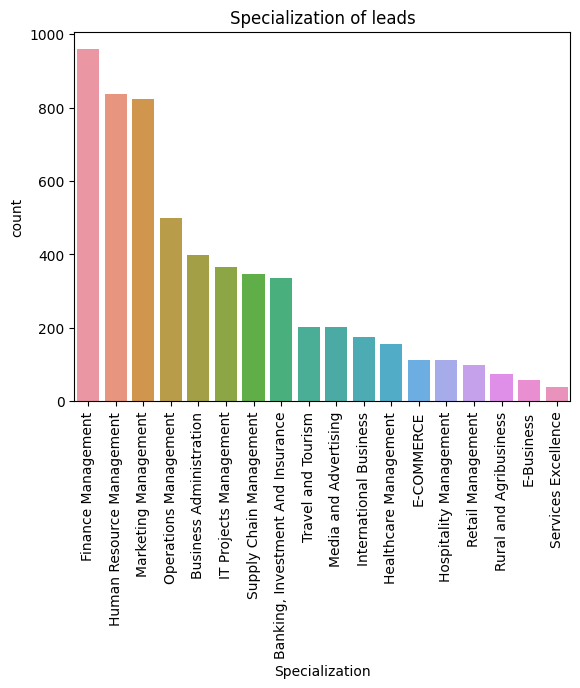

In [39]:
data_c = data3[data3['Specialization'] != 'NA']
sns.countplot(x = 'Specialization', data = data_c, order = data_c['Specialization'].value_counts().index)
plt.title("Specialization of leads")
plt.xticks(rotation = 90);

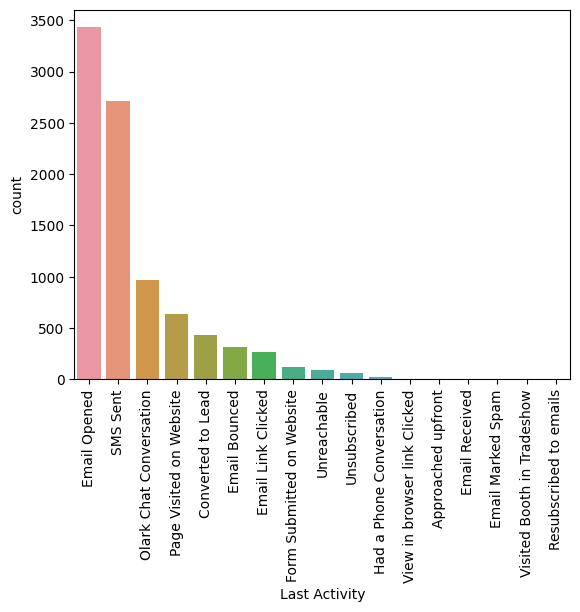

In [40]:
activity = data3['Last Activity'].value_counts().index
sns.countplot(x = 'Last Activity', data=data3, order = activity)
plt.xticks(rotation=90);

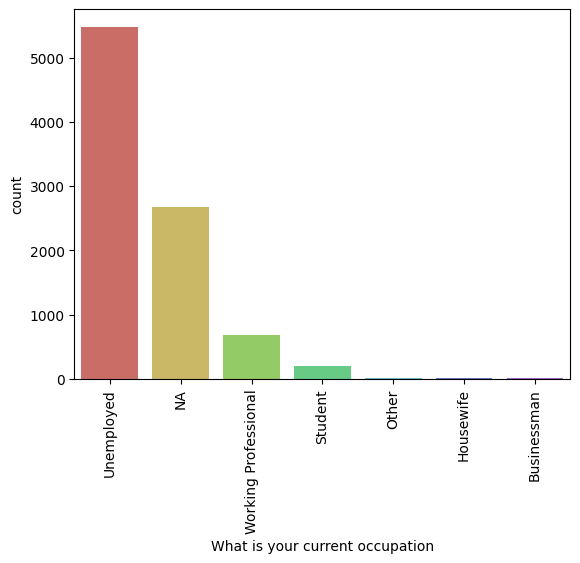

In [41]:
occupation = data3['What is your current occupation'].value_counts().index
sns.countplot(x = 'What is your current occupation', data=data3, order = occupation, palette=sns.color_palette("hls", 8))
plt.xticks(rotation=90);

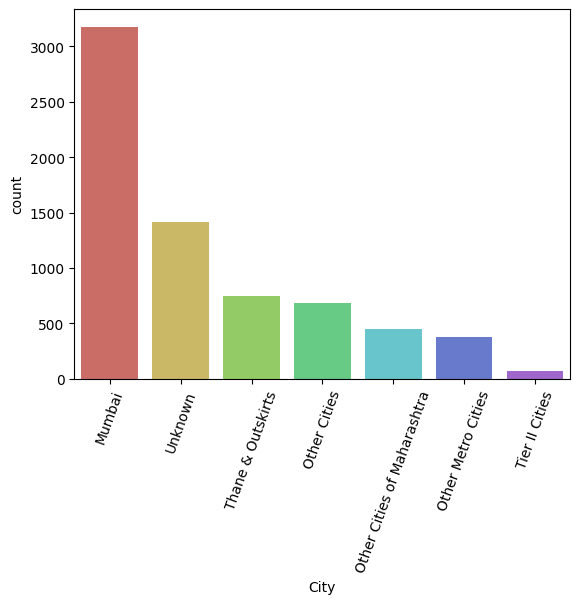

In [42]:
data_new = data3[data3['City'] != 'Select']
city_count = data_new['City'].value_counts().index
sns.countplot(x = 'City', data=data_new, order = city_count, palette=sns.color_palette("hls", 8))
plt.xticks(rotation=70);

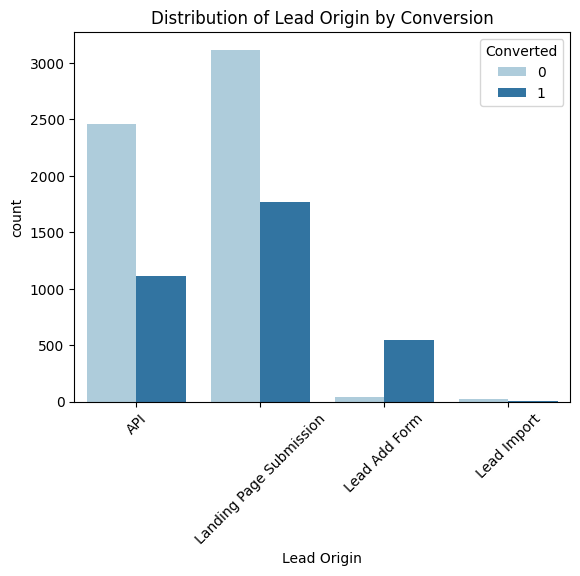

In [43]:
sns.countplot(x = 'Lead Origin', data = data3, hue = 'Converted', palette=sns.color_palette("Paired"))
plt.xticks(rotation = 45)
plt.title("Distribution of Lead Origin by Conversion");

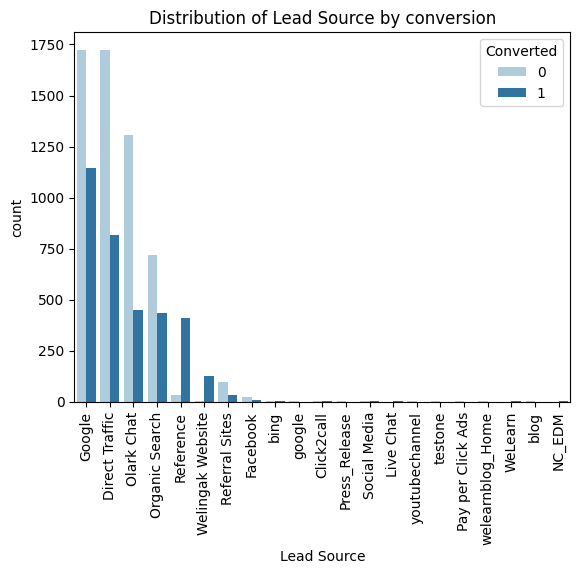

In [44]:
sns.countplot(x = 'Lead Source', data = data3, hue = 'Converted', order = data3['Lead Source'].value_counts().index, palette=sns.color_palette("Paired"))
plt.xticks(rotation = 90)
plt.title("Distribution of Lead Source by conversion");

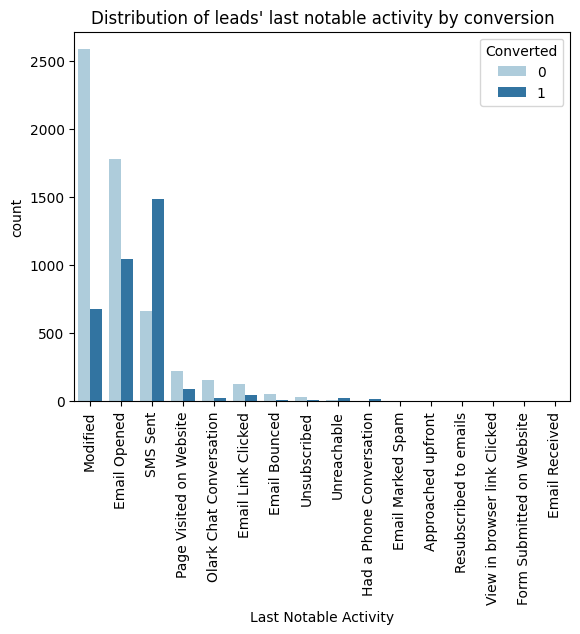

In [45]:
sns.countplot(x = 'Last Notable Activity', data = data3, hue = 'Converted', order = data3['Last Notable Activity'].value_counts().index, palette=sns.color_palette("Paired"))
plt.xticks(rotation = 90)
plt.title("Distribution of leads' last notable activity by conversion");

In [46]:
data3.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,What is your current occupation,Search,Digital Advertisement,Through Recommendations,Tags,Update me on Supply Chain Content,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,NA,...,Unemployed,0,No,0,Interested in other courses,No,Select,Select,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,NA,...,Unemployed,0,No,0,Ringing,No,Select,Select,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,...,Student,0,No,0,Will revert after reading the email,No,Potential Lead,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,...,Unemployed,0,No,0,Ringing,No,Select,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,NA,...,Unemployed,0,No,0,Will revert after reading the email,No,Select,Mumbai,0,Modified


In [47]:
data3.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Search', 'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Update me on Supply Chain Content', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Encoding

In [48]:
#applying ohe on the remaining categorical columns

# Select all categorical columns
cat_columns = data3.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data3, columns=cat_columns)
data_encoded.shape

(9074, 149)

In [49]:
data_encoded1 = data_encoded.copy()

In [50]:
X = data_encoded.drop('Converted', axis=1)
y = data_encoded['Converted']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# create the Normalizer object
scaler = StandardScaler()

# fit transform the data
X_scaled = scaler.fit_transform(X)

data = pd.DataFrame(X_scaled)


X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train, y_train)
pred_prob1 = lr.predict_proba(X_test)[:,1]

threshold = 0.5
y_pred_lr = (pred_prob1 > threshold).astype(int)

In [53]:
accuracy = lr.score(X_test, y_test)
print("Accuracy: ", accuracy)

precision = precision_score(y_test, y_pred_lr)
print("precision: ", precision )

recall = recall_score(y_test, y_pred_lr)
print("Recall: ", recall)

f1 = f1_score(y_test, y_pred_lr)
print("F1 score: ", f1)

Accuracy:  0.9388429752066115
precision:  0.9263622974963182
Recall:  0.9115942028985508
F1 score:  0.9189189189189191


In [54]:
cm1 = confusion_matrix(y_test, y_pred_lr)
print(cm1)

[[1075   50]
 [  61  629]]


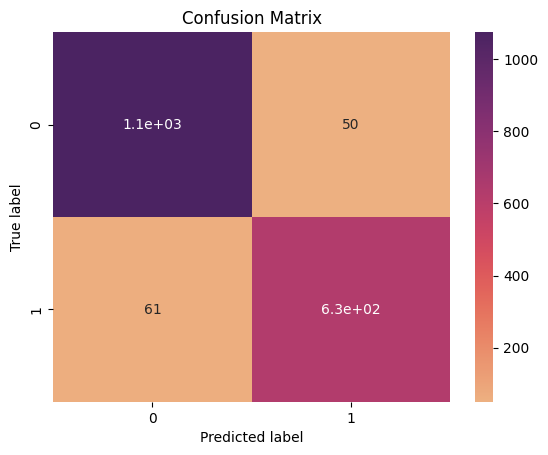

In [55]:
sns.heatmap(cm1, annot = True, cmap=sns.color_palette("flare", as_cmap=True))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show();

Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = lr.predict(X_test)

In [57]:
accuracy_rf = rf.score(X_test, y_test)
print("Accuracy: ", accuracy_rf)

precision_rf = precision_score(y_test, y_pred_rf)
print("precision: ", precision_rf )

recall_rf = recall_score(y_test, y_pred_rf)
print("Recall: ", recall_rf)

f1_rf = f1_score(y_test, y_pred_rf)
print("F1 score: ", f1_rf)

Accuracy:  0.9410468319559229
precision:  0.9263622974963182
Recall:  0.9115942028985508
F1 score:  0.9189189189189191


In [58]:
cm2 = confusion_matrix(y_test, y_pred_rf)
print(cm2)

[[1075   50]
 [  61  629]]


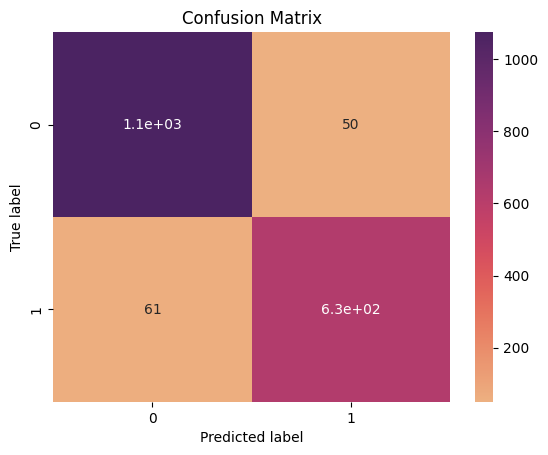

In [59]:
sns.heatmap(cm2, annot = True, cmap=sns.color_palette("flare", as_cmap=True))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show();

In [60]:
from sklearn.model_selection import GridSearchCV

#Fit logistic model
parameters_lr = {'penalty': ['l1', 'l2'], 'C' : np.logspace(-3,3,5,base=10.0)}
lr1 = LogisticRegression(solver='liblinear', random_state=123)

lr_cv = GridSearchCV(lr1, param_grid=parameters_lr, cv=5, scoring='roc_auc', n_jobs=-1)
lr_cv.fit(X_train, y_train)

print(lr_cv.best_params_)
lr_best = lr_cv.best_estimator_

{'C': 0.03162277660168379, 'penalty': 'l2'}


In [61]:
#Fit random forest classifier w/ hyperparameter tuning
parameters_rf = {'max_depth':np.arange(6,30,2),'min_samples_leaf':np.arange(100,500,50)}
rf1 = RandomForestClassifier()

rf_cv = GridSearchCV(rf1, param_grid=parameters_rf, cv=5, scoring='roc_auc', n_jobs=-1)
rf_cv.fit(X_train, y_train)

print(rf_cv.best_params_)
rf_best = rf_cv.best_estimator_

{'max_depth': 28, 'min_samples_leaf': 100}


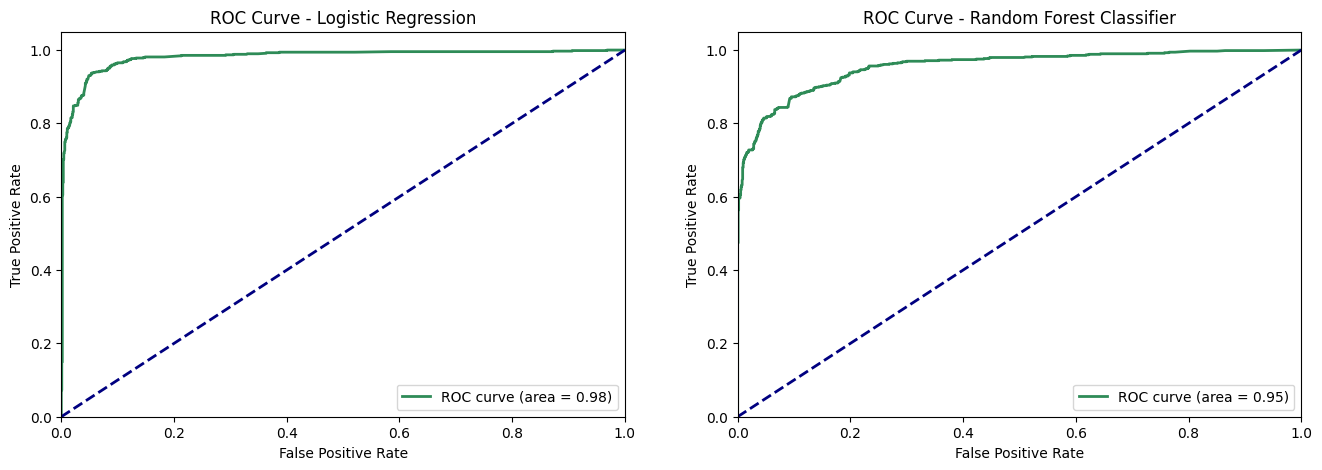

In [62]:
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
models = {'Logistic Regression':lr_best, 'Random Forest Classifier':rf_best}

for n,m in models.items():
    # Get predicted probabilities for the test set
    y_pred_proba = m.predict_proba(X_test)[:,1]

    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    axes[list(models.keys()).index(n)].plot(fpr, tpr, color='seagreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axes[list(models.keys()).index(n)].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[list(models.keys()).index(n)].set_xlim([0.0, 1.0])
    axes[list(models.keys()).index(n)].set_ylim([0.0, 1.05])
    axes[list(models.keys()).index(n)].set_xlabel('False Positive Rate')
    axes[list(models.keys()).index(n)].set_ylabel('True Positive Rate')
    axes[list(models.keys()).index(n)].set_title('ROC Curve - ' + n)
    axes[list(models.keys()).index(n)].legend(loc="lower right")

plt.show()


The Logistic Regression model performs slightly better as it shows a higher curve than Random Forest Classifier